In [27]:
import numpy as np
import pandas as pd
import seaborn as sn
import utils as utils
import matplotlib.pyplot as plt
import evaluations

# Task 1 : KNN with 4 features

### loading 30s dataset

In [28]:
df = utils.task1_df()
df.head()

,spectral_rolloff_mean,mfcc_1_mean,spectral_centroid_mean,tempo,Type,GenreID
0,5351.909304,9.675074,2569.255823,117.453835,Train,0
1,6839.566975,-63.635056,2844.070408,107.666016,Train,0
2,6873.341771,-119.346458,2765.648135,161.499023,Train,0
3,7534.996104,-26.936581,3634.106564,117.453835,Train,0
4,7879.044023,-8.531343,3671.260489,129.199219,Train,0


In [29]:
X_train_scaled, y_train, X_test_scaled, y_test = utils.train_val_split(df)

### Begin knn training

In [30]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance')# Fit the classifier to the data
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(weights='distance')

In [31]:
y_pred = knn.predict(X_test_scaled)

### Evaluation

Confusion Matrix

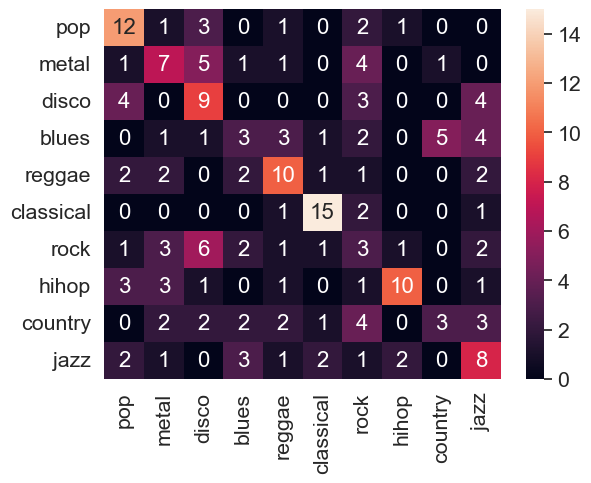

In [32]:
evaluations.conf_matrix(y_pred, y_test)

Sensitivity and Specificity for each class

In [33]:
p = evaluations.multiclass_performance_metrics(y_pred, y_test)
print(f"Accuracy : {p.tp.sum()/len(y_pred)}\n"
      f"Macro F1 score : {p.F1Score.mean()}")
p

Accuracy : 0.40404040404040403
Macro F1 score : 0.3983546564284398


,tp,tn,fp,fn,F1Score
pop,12,165,13,8,0.533333
metal,7,165,13,13,0.350000
disco,9,160,18,11,0.382979
blues,3,168,10,17,0.181818
reggae,10,167,11,10,0.487805
classical,15,173,6,4,0.750000
rock,3,158,20,17,0.139535
hihop,10,174,4,10,0.588235
country,3,173,6,16,0.214286
jazz,8,161,17,12,0.355556


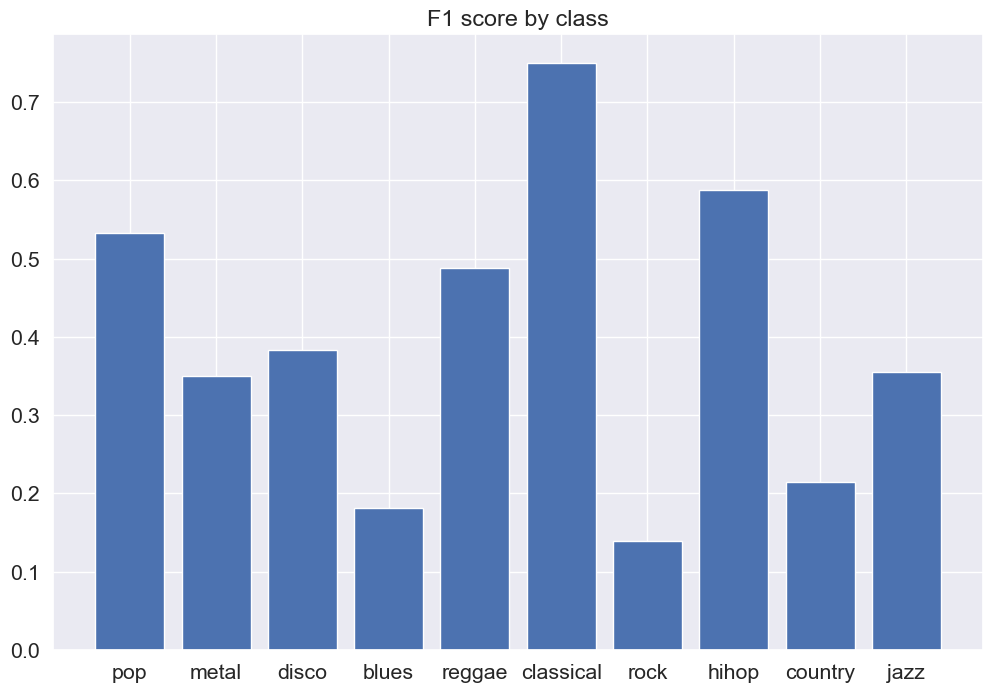

In [34]:
plt.figure(figsize=(12, 8))
plt.bar(utils.genreNames, p.F1Score)
plt.title("F1 score by class")
plt.show()